# Predicting the Survival of Titanic Passengers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#from above 38% survived the disaster
total = train_df.isnull().sum().sort_values(ascending=False)
total1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent = (round(total1, 1)).sort_values(ascending=False)
NAN_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
NAN_data.head()
#looking for empty data

,total,percent
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [6]:
train_df.columns#to know what columns are present

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
survived='survived'
not_survived='not survived'
men=train_df[train_df['Sex']=='male']
female=train_df[train_df['Sex']=='female']
women_x=female[female['Survived']==1].Age.dropna()
male_x=men[men['Survived']==1].Age.dropna()
women_y=female[female['Survived']==0].Age.dropna()
male_y=men[men['Survived']==0].Age.dropna()
#to plot men and women we need to create a feature for each

Text(0.5,1,'Male')

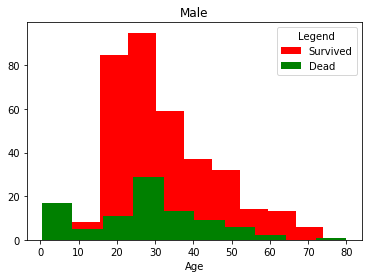

In [8]:
plt.hist(male_y,color='red',label='Survived')
plt.xlabel('Age')
label=['Survived','Dead']
plt.legend(title='Legend',loc=1)
plt.hist(male_x,color='green',label='Dead')
plt.legend(title='Legend',loc=0)
plt.title('Male')
#plotting histogram using matplotlib

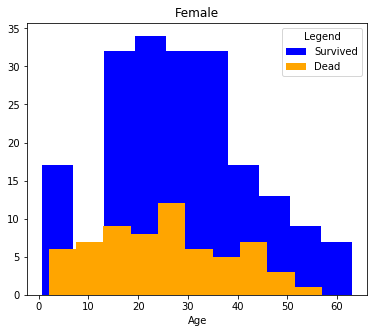

In [9]:
plt.figure(figsize=(6.1,5))
plt.hist(women_x,color='blue',label='Survived')
plt.xlabel('Age')
label=['Survived','Dead']
plt.legend(title='Legend',loc=1)
plt.hist(women_y,color='orange',label='Dead')
plt.legend(title='Legend',loc=0)
plt.title('Female')
plt.show()
#plotting histogram using matplotlib

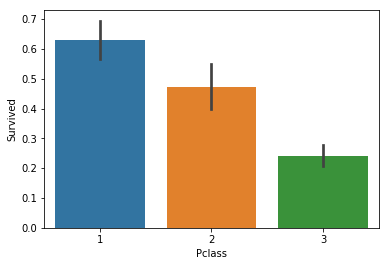

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
#plotting barplots using seaborn 
#plotting  Pclass aganist survived
#first class people survived more

In [11]:
train_df = train_df.drop(['Cabin','PassengerId'], axis=1)
test_df = test_df.drop(['Cabin','PassengerId'], axis=1)
#dropping PassengerId because its not needed and no co-relation with survival

In [12]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()
#filling na of age with respect to sum of mean and std deviation and converting it into int dtype

0

In [13]:
train_df['Embarked'].describe()#to find common value of embarked column

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
common='S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common)
#Emabrked has only 2 missing values, we will fill these most common values.

In [15]:
train_df.info()
#details about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 66.2+ KB


In [16]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)
#converting fare into int

In [17]:
#Convert ‘Sex’ feature into numeric.
data = [train_df, test_df]
gender={"male":0,"female":1}
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(gender)

In [18]:
train_df['Ticket'].describe()#to know about ticket column

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [19]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
#Since the Ticket attribute has 681 unique tickets, 
#it will be a bit tricky to convert them into useful categories. So we will drop it from the dataframe.

In [20]:
#Convert ‘Embarked’ feature into numeric.
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [21]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group.

In [22]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [23]:
#For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. 
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [24]:
#creating a new feature
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [25]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test=test_df
#Building Machine Learning Models

# Building Machine Learning Models

# Stochastic Gradient Descent:

In [43]:
sgd = linear_model.SGDClassifier(max_iter=100, tol=1e-3)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_test, Y_pred) * 100, 2)
print(acc_sgd)

100.0


# Decision Tree



In [40]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_test, Y_pred) * 100, 2)
print(acc_decision_tree)

100.0


# K Nearest Neighbor:

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_test, Y_pred) * 100, 2)
print(acc_knn)

100.0


# Random Forest:

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_pred) * 100, 2)
print(acc_random_forest)

86.36


# Linear Support Vector Machine:

In [35]:
linear_svc = LinearSVC( max_iter=19000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_pred) * 100, 2)
print(acc_linear_svc)

100.0


# Logistic Regression:

In [37]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)  
acc_log = round(decision_tree.score(X_test, Y_pred) * 100, 2)
print(acc_log)

84.45


# Gaussian Naive Bayes:


In [42]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train) 
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_test, Y_pred) * 100, 2)
acc_gaussian

100.0

<b>Which is the best Model ?</b>

In [33]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')

In [34]:
result_df

,Model
Score,
90.91,Logistic Regression
90.91,Random Forest
90.91,Decision Tree
87.09,KNN
80.36,Support Vector Machines
79.46,Stochastic Gradient Decent
78.68,Naive Bayes
